<style>
h1 {text-align: center; background-color:green}
</style>
<h1>Green Taxis Analysis for the Month of January 2023</h1>

# Business Understanding

## Background Business

**The New York City Taxi and Limousine Commission (TLC)**, created in 1971, is the agency responsible 
**for licensing and regulating** New York City's medallion (yellow) taxis, street hail livery (green) taxis, 
for-hire vehicles (FHVs), commuter vans, and paratransit vehicles. The TLC collects trip record 
information for each taxi and for-hire vehicle trip completed by their licensed drivers and vehicles. 
They receive taxi trip data from the technology service providers (TSPs) that provide electronic 
metering in each cab, and FHV trip data from the app, community livery, black car, or luxury 
limousine company, or base, who dispatched the trip. In each trip record dataset, one row represents a single trip made by a TLC-licensed vehicle.

![Vehicle Type](asset\pictures\vehicle_type.png "Vehicle Type")

**Green taxis**, also known as **boro taxis** and **street-hail liveries**, were introduced in August of 2013 **to 
improve taxi service and availability in the 
boroughs**. Green taxis may respond to street hails, 
but only in the areas indicated in green on the 
map (i.e. above W 110 St/E 96th St in Manhattan 
and in the boroughs). They cannot pick up passengers 
at airports unless the trips are pre-arranged through a base. SHLs are inspected 
twice per year, and drivers must pass a driver education course. Fares are set by 
the TLC on street hails and e-hails. the dispatching base sets the fare when service 
is pre-arranged.

![Green Taxi](asset\pictures\vehicle_type_green.png "Green Taxi")

![Boro Map](asset\pictures\boro_map.jpg "Boro Map")

In this scenario, **we will focus on this type of taxis (green).**

You can take a look at these e-book for more information.
- [Trip Record User Guide](https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf)
- [2020 TLC Factbook](https://www.nyc.gov/assets/tlc/downloads/pdf/2020-tlc-factbook.pdf)
- [2018 TLC Factbook](https://www.nyc.gov/assets/tlc/downloads/pdf/2018_tlc_factbook.pdf)

## Business Problem

At the first launch of green taxis in August 2013, it was smooth and looks promising. But it wasn't long until the launch of For-Hire Vehicle (FHV) or we can call it online taxis, that came in April 2015. The very first boro taxi driver gave her tought and experience while working as a driver in this segment for almost a decade. In the article she said **"We did the first two years very well, my colleagues were making money. But then everything went grim when the apps came in".** The city did not put limits on the number of app-based cars, known as for-hire vehicles, until 2018, when the TLC said there were more than 80,000 on city streets.

<div>
<img src="asset\pictures\article.png" width="500"/>
</div>

[It’s Not Easy Being Green: First Ever ‘Boro Taxi’ Driver Hits Brakes as Industry Tanks](https://www.thecity.nyc/2022/03/02/its-not-easy-being-green-first-ever-boro-taxi-driver-hits-brakes-as-industry-tanks/)

Looking at the [2018 TLC Factbook](https://www.nyc.gov/assets/tlc/downloads/pdf/2018_tlc_factbook.pdf). This book shows the overview and trend of the NYC TLC until the middle of year 2018. We can take a look at the active vehicle for each taxi types from 2010 to 2018. The green taxis have an uptrend until the launch of online taxis, affter that the trend going down. While the FHV (online taxis) trend is upwards and yellow taxis remain steadily.

The same goes to the number of licensed vehicles. Where the number of licensed green taxis were **decreased** by 36% in 2018 compared to two years before (2016).

<div>
<img src="asset/pictures/active_vehicle.png" width="500"/> <img src="asset\pictures\licensed_vehicle.png" width="500"/>
</div>

As the number of green taxis goes down, the daily average trips of green taxis were having the same problem. For three consecutive year (2016, 2017, 2018) the daily average trips of green taxis were **decreased** over the years.

<div>
<img src="asset\pictures\daily_average_trip.png" width="500"/> 
</div>

## Data Analysis Goals

As the demand for green taxis is decreased over the year. The easiest way is to change to an online taxi (FHV). But for some people that loves to work on their own schedule without affiliation to online taxis company. There's still a way out of this situation. By using the power of data, we will try to uncover a knowledge that hopefully can help green taxi drivers to maximize their potential. In this data analysis project, **we will use data of green taxi operations that populated in the month of January 2023**. You can download the dataset using [this link](https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet).


By delving deeper into specific aspects of taxi operations, we can uncover some truth that can provide a beneficial information for green taxi drivers. In this analysis we want to figure out the demand based on the region (borough & zone) and time. Hopefully this can tailor green taxi drivers in order to find their potential customers.

The main goal is to provide insights to green taxi drivers or any other stakeholders that can assist in their strategy and decision-making by knowing the right place and the right moment. Here are several things that we want to know by looking at the data:
1. Which borough have the most total trips and revenue?
2. How is the distribution of trips and revenue in each borough?
3. How are the daily, weekly, and hourly trends/patterns of total trips?

Aside from the main goal, here we will try to uncover any **hidden information by drilling through the data into a very specific parts.**

# Data Cleaning & Wrangling

In [1]:
import pandas as pd
import math
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/NYC TLC Trip Record.csv', low_memory=False)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


This data contain several fields of information that listed below. You can also take a look at this [metadata](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

| Field Name | Description|
| --- | --- |
| VendorID | A code indicating the LPEP provider that provided the record |
| lpep_pickup_datetime | The date and time when the meter was engaged |
| lpep_dropoff_datetime | The date and time when the meter was disengaged |
| Passenger_count | The number of passengers in the vehicle. This is a driver-entered value |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
| RateCodeID | The final rate code in effect at the end of the trip |
| Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server |
| Payment_type | A numeric code signifying how the passenger paid for the trip |
| Fare_amount | The time-and-distance fare calculated by the meter |
| Extra | Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges |
| MTA_tax | $0.50 MTA tax that is automatically triggered based on the metered rate in use |
| Improvement_surcharge | $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015 |
| Tip_amount | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included |
| Tolls_amount | Total amount of all tolls paid in trip |
| Total_amount | The total amount charged to passengers. Does not include cash tips |
| Trip_type | A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver |

In [3]:
df.shape

(68211, 20)

## Duplication

In [4]:
df.duplicated().sum()

0

## Column with Blank Values

In [5]:
df['ehail_fee'].isna().sum()

68211

In [6]:
df.drop(columns='ehail_fee', axis=1, inplace=True)

## Missing Values

In [7]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

In [8]:
df_missing = df[df.isna().any(axis=1)]
df_missing

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.30,18.20,0.0,1.5,0.00,0.0,1.0,19.70,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.70,23.50,0.0,1.5,0.00,0.0,1.0,25.00,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.20,28.20,0.0,1.5,0.00,0.0,1.0,29.70,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.70,22.50,0.0,1.5,0.00,0.0,1.0,24.00,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.50,24.20,0.0,1.5,0.00,0.0,1.0,25.70,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [9]:
print(f'Missing values proportion: {round(len(df_missing)/len(df) * 100, 2)}%')

Missing values proportion: 6.35%


In [10]:
print(f'Num of rows: {len(df)}')
df.dropna(inplace=True)
print(f'Num of rows after dropna: {len(df)}')

Num of rows: 68211
Num of rows after dropna: 63877


## Decode All Encoded Columns

In [11]:
df['VendorID'] = df['VendorID'].replace({1:'Creative Mobile Technologies, LLC', 
                                         2: 'VeriFone Inc'})
df['RatecodeID'] = df['RatecodeID'].replace({1.0: 'Standard rate',
                                             2.0: 'JFK',
                                             3.0: 'Newark', 
                                             4.0: 'Nassau or Westchester',
                                             5.0: 'Negotiate fare',
                                             6.0: 'Group ride',
                                             99.0: 'Unknown'})
df['payment_type'] = df['payment_type'].replace({1.0: 'Credit card',
                                                 2.0: 'Cash',
                                                 3.0: 'No charge',
                                                 4.0: 'Dispute',
                                                 5.0: 'Unknown',
                                                 6.0: 'Voided trip'})
df['trip_type'] = df['trip_type'].replace({1.0: 'Street-hail',
                                           2.0: 'Dispatch'})

df.rename(columns={'VendorID':'Vendor', 'RatecodeID':'Ratecode'}, inplace=True)

## Incorrect Data Types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63877 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vendor                 63877 non-null  object 
 1   lpep_pickup_datetime   63877 non-null  object 
 2   lpep_dropoff_datetime  63877 non-null  object 
 3   store_and_fwd_flag     63877 non-null  object 
 4   Ratecode               63877 non-null  object 
 5   PULocationID           63877 non-null  int64  
 6   DOLocationID           63877 non-null  int64  
 7   passenger_count        63877 non-null  float64
 8   trip_distance          63877 non-null  float64
 9   fare_amount            63877 non-null  float64
 10  extra                  63877 non-null  float64
 11  mta_tax                63877 non-null  float64
 12  tip_amount             63877 non-null  float64
 13  tolls_amount           63877 non-null  float64
 14  improvement_surcharge  63877 non-null  float64
 15  total_a

In [13]:
# Datetime

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [14]:
# Qualitative

# to Nominal
nominal_column = ['Vendor', 'store_and_fwd_flag',  'Ratecode',
                  'payment_type', 'trip_type']
for column in nominal_column:
    df[column] = pd.Categorical(df[column])

In [15]:
# Quantitative

# to int
df['passenger_count'] = df['passenger_count'].astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63877 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Vendor                 63877 non-null  category      
 1   lpep_pickup_datetime   63877 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63877 non-null  datetime64[ns]
 3   store_and_fwd_flag     63877 non-null  category      
 4   Ratecode               63877 non-null  category      
 5   PULocationID           63877 non-null  int64         
 6   DOLocationID           63877 non-null  int64         
 7   passenger_count        63877 non-null  int64         
 8   trip_distance          63877 non-null  float64       
 9   fare_amount            63877 non-null  float64       
 10  extra                  63877 non-null  float64       
 11  mta_tax                63877 non-null  float64       
 12  tip_amount             63877 non-null  float64       
 13  tolls_

## Feature Engineering (Date)

In [17]:
df['lpep_pickup_date'] = df['lpep_pickup_datetime'].dt.date
df['lpep_dropoff_date'] = df['lpep_dropoff_datetime'].dt.date

df['lpep_pickup_day_name'] = df['lpep_pickup_datetime'].dt.day_name()
df['lpep_pickup_day'] = df['lpep_pickup_datetime'].dt.day
df['lpep_pickup_day_of_week'] = df['lpep_pickup_datetime'].dt.day_of_week
df['lpep_pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

In [18]:
def bin_hour(hour):
    if hour < 5:
        text = 'night'
    elif hour < 12:
        text = 'morning'
    elif hour < 18:
        text = 'afternoon'
    elif hour < 22:
        text = 'evening'
    else:
        text = 'night'
    return text

df['time_category'] = df['lpep_pickup_hour'].map(bin_hour)

In [19]:
df['trip_duration_minutes'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).map(lambda x: x.seconds//60)

## Invalid Values

In [20]:
# Numeric value < 0
certain_num_column = 'fare_amount' ,'extra' ,'mta_tax', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'
for column in certain_num_column:
    df[column] = df[column].map(lambda x: abs(x))

In [21]:
# Numeric value == 0 (doesn't make sense)
df['passenger_count'] = df['passenger_count'].replace({0: df['passenger_count'].median()})

In [22]:
# Pickup datetime later than Dropoff datetime
(df['lpep_pickup_datetime'] > df['lpep_dropoff_datetime']).sum()

0

In [23]:
# Date outside of Januari 2023
df[(df['lpep_pickup_date'] < datetime.date(2023,1,1)) | (df['lpep_pickup_date'] > datetime.date(2023,1,31))]
df.drop(df[(df['lpep_pickup_date'] < datetime.date(2023,1,1)) | (df['lpep_pickup_date'] > datetime.date(2023,1,31))].index, inplace=True)

## Outliers

In [24]:
quantitative_column = df.select_dtypes(include=['float', 'int']).columns
qualitative_column = df.select_dtypes(include=['category']).columns

In [25]:
def box_plot(df, features):
    n_column_axis = 4
    fig, ax = plt.subplots(math.ceil(len(features)/n_column_axis), n_column_axis, figsize=(20, 15))
    column_num = 0
    row_num = 0
    for feature in features:
        if column_num == 4:
            row_num += 1
            column_num = 0
        sns.boxplot(data=df, x=feature, ax=ax[row_num][column_num])
        column_num += 1
    plt.tight_layout()
    plt.show()

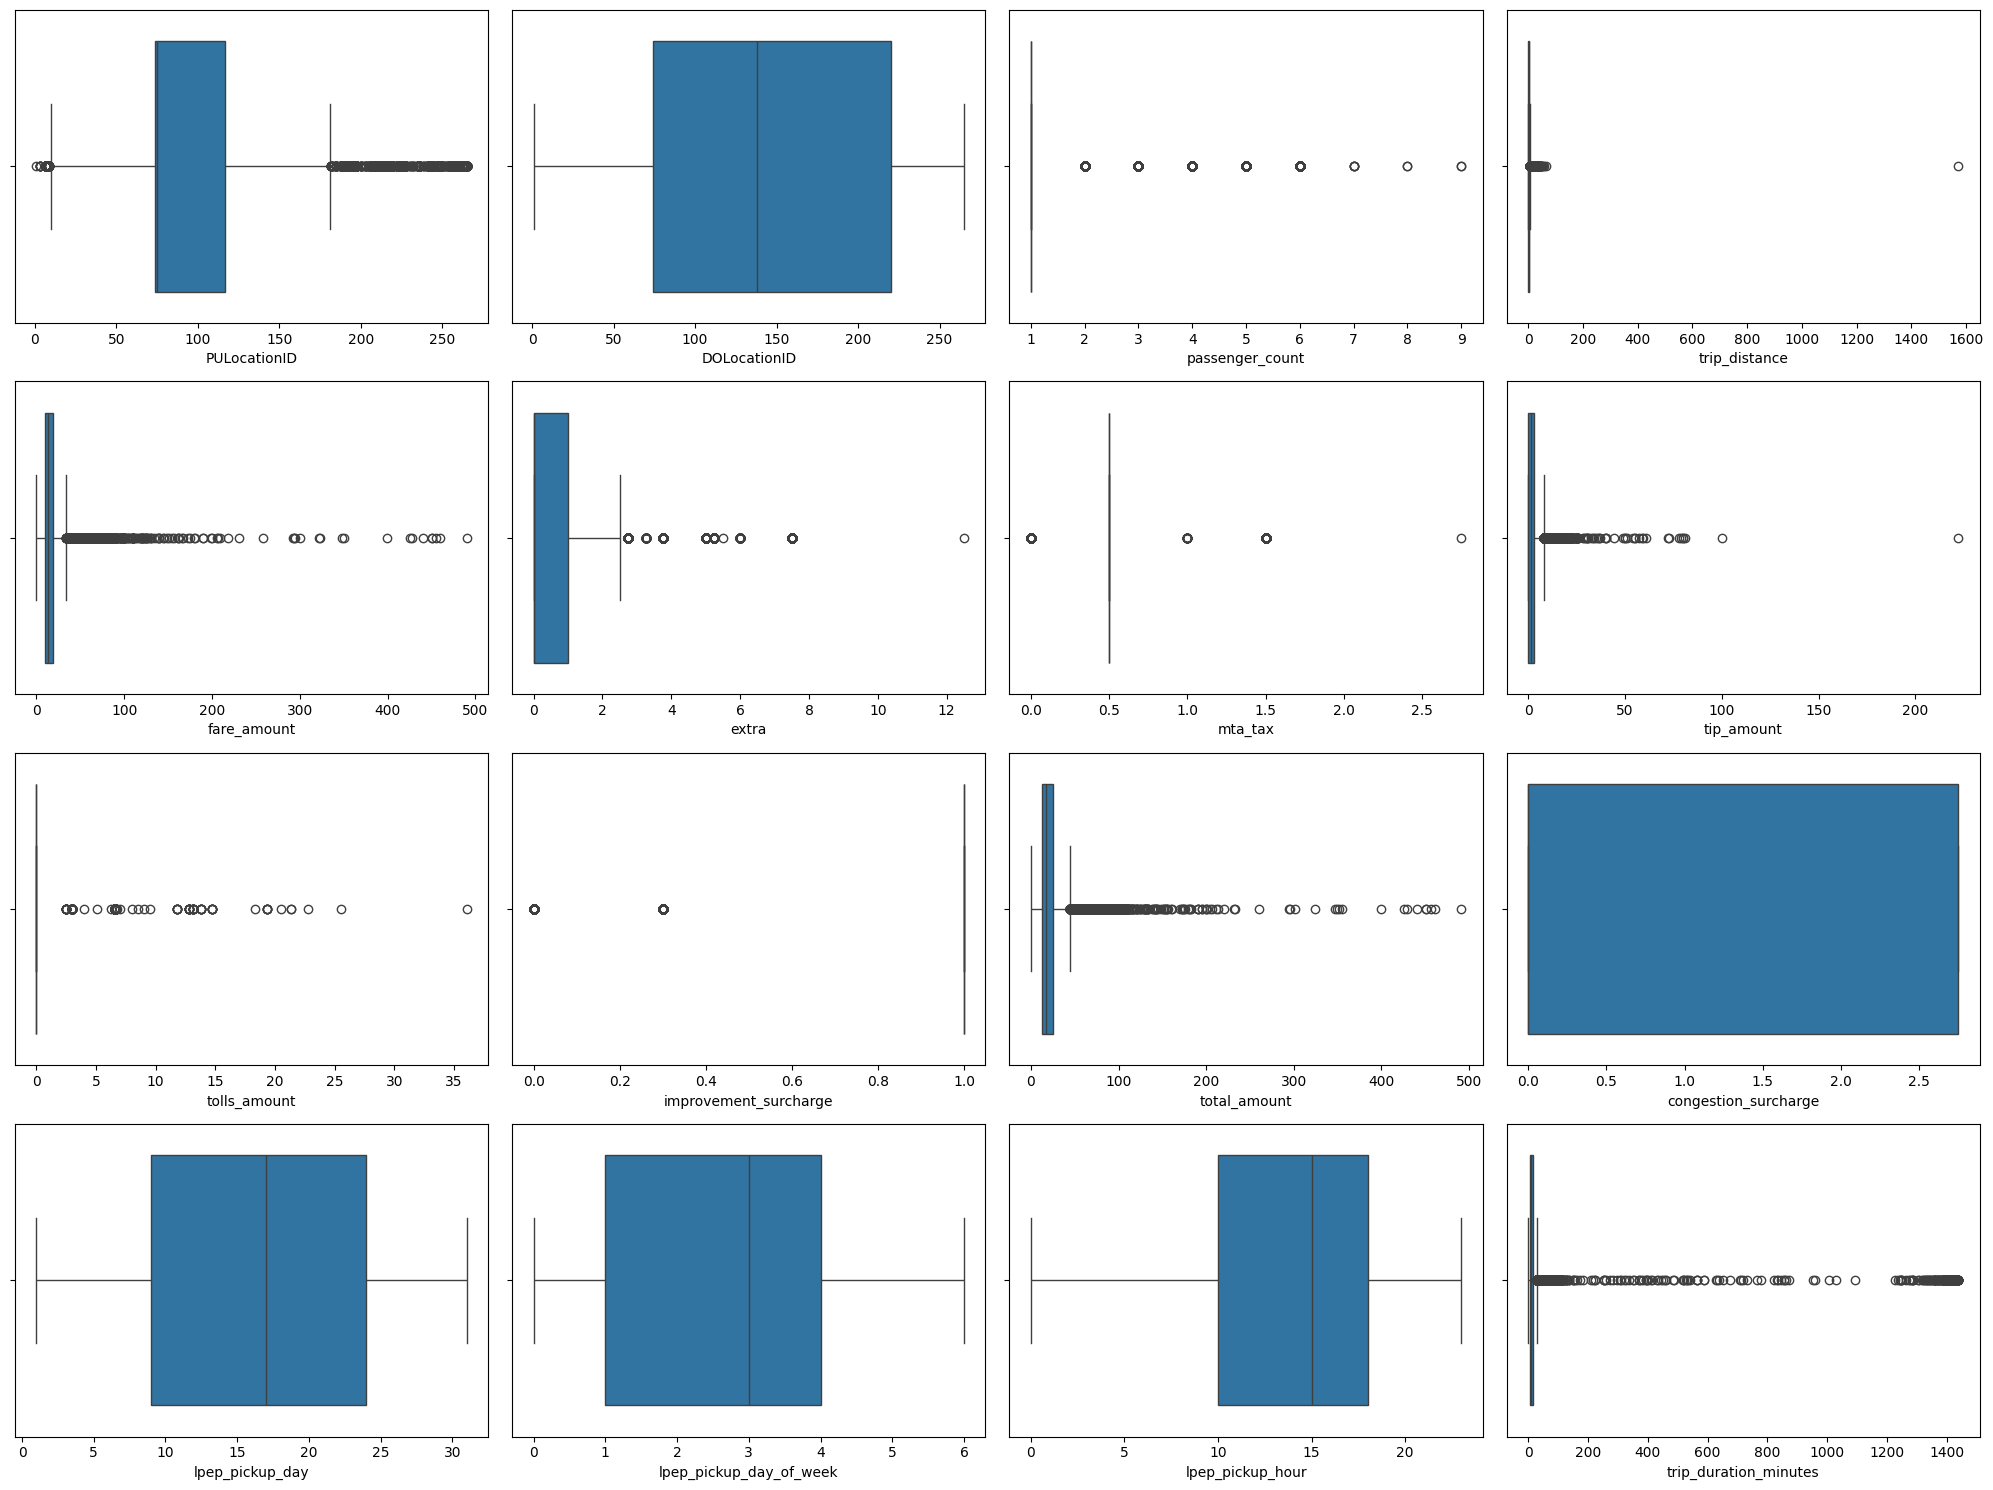

In [26]:
box_plot(
    df=df,
    features=quantitative_column
)

In [27]:
# trip_distance outlier
df[df['trip_distance'] > 200]

,Vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,Ratecode,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_date,lpep_dropoff_date,lpep_pickup_day_name,lpep_pickup_day,lpep_pickup_day_of_week,lpep_pickup_hour,time_category,trip_duration_minutes
33373,VeriFone Inc,2023-01-17 18:40:38,2023-01-17 19:04:45,N,Negotiate fare,82,236,1,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,Credit card,Street-hail,2.75,2023-01-17,2023-01-17,Tuesday,17,1,18,evening,24


In [28]:
drop_index = df[df['trip_distance'] > 200].index
df.drop(index=drop_index, inplace=True)

## Dimension Table (Zone)

In [29]:
zone = pd.read_csv('data/taxi_zone_lookup.csv')
zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [30]:
# Get Zone Name & Service Zone for Pick Up & Drop Off
df = df.merge(zone, left_on='PULocationID', right_on='LocationID').drop(axis=1, columns=['LocationID'])
df = df.merge(zone, left_on='DOLocationID', right_on='LocationID').drop(axis=1, columns=['LocationID'])
df.rename(columns={'Zone_x':'PU Location Name', 'service_zone_x':'PU Service Zone', 'Borough_x':'PU Borough',
                   'Zone_y':'DO Location Name', 'service_zone_y':'DO Service Zone', 'Borough_y':'DO Borough'}, inplace=True)

In [31]:
df

,Vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,Ratecode,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_date,lpep_dropoff_date,lpep_pickup_day_name,lpep_pickup_day,lpep_pickup_day_of_week,lpep_pickup_hour,time_category,trip_duration_minutes,PU Borough,PU Location Name,PU Service Zone,DO Borough,DO Location Name,DO Service Zone
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,2023-01-01,2023-01-01,Sunday,1,6,0,night,11,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,2023-01-01,2023-01-01,Sunday,1,6,0,night,6,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,VeriFone Inc,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail,0.00,2023-01-01,2023-01-01,Sunday,1,6,0,night,6,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,"Creative Mobile Technologies, LLC",2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00,2023-01-01,2023-01-01,Sunday,1,6,0,night,5,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,"Creative Mobile Technologies, LLC",2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00,2023-01-01,2023-01-01,Sunday,1,6,0,night,5,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63867,VeriFone Inc,2023-01-31 23:09:22,2023-01-31 23:17:21,N,Negotiate fare,130,205,1,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch,0.00,2023-01-31,2023-01-31,Tuesday,31,1,23,night,7,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone
63868,VeriFone Inc,2023-01-31 23:06:18,2023-01-31 23:17:03,N,Standard rate,65,181,1,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail,0.00,2023-01-31,2023-01-31,Tuesday,31,1,23,night,10,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone
63869,VeriFone Inc,2023-01-31 23:17:03,2023-01-31 23:23:04,N,Standard rate,244,116,1,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail,0.00,2023-01-31,2023-01-31,Tuesday,31,1,23,night,6,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone
63870,VeriFone Inc,2023-01-31 23:29:18,2023-01-31 23:38:50,N,Standard rate,74,238,1,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail,2.75,2023-01-31,2023-01-31,Tuesday,31,1,23,night,9,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone


## Save Cleaned Data

In [32]:
df.reset_index(drop=True, inplace=True)
df.to_csv('data/NYC TLC Trip Record Cleaned.csv', index=False)

# Exploratory Data Analysis

## Qualitative Data Distribution

In [33]:
def count_plot(df, features):
    n_column_axis = 2
    fig, ax = plt.subplots(math.ceil(len(features)/n_column_axis), n_column_axis, figsize=(20, 15))
    column_num = 0
    row_num = 0
    for feature in features:
        if column_num == 2:
            row_num += 1
            column_num = 0
        sns.countplot(data=df, y=feature, ax=ax[row_num][column_num])
        column_num += 1
    plt.tight_layout()
    plt.show()

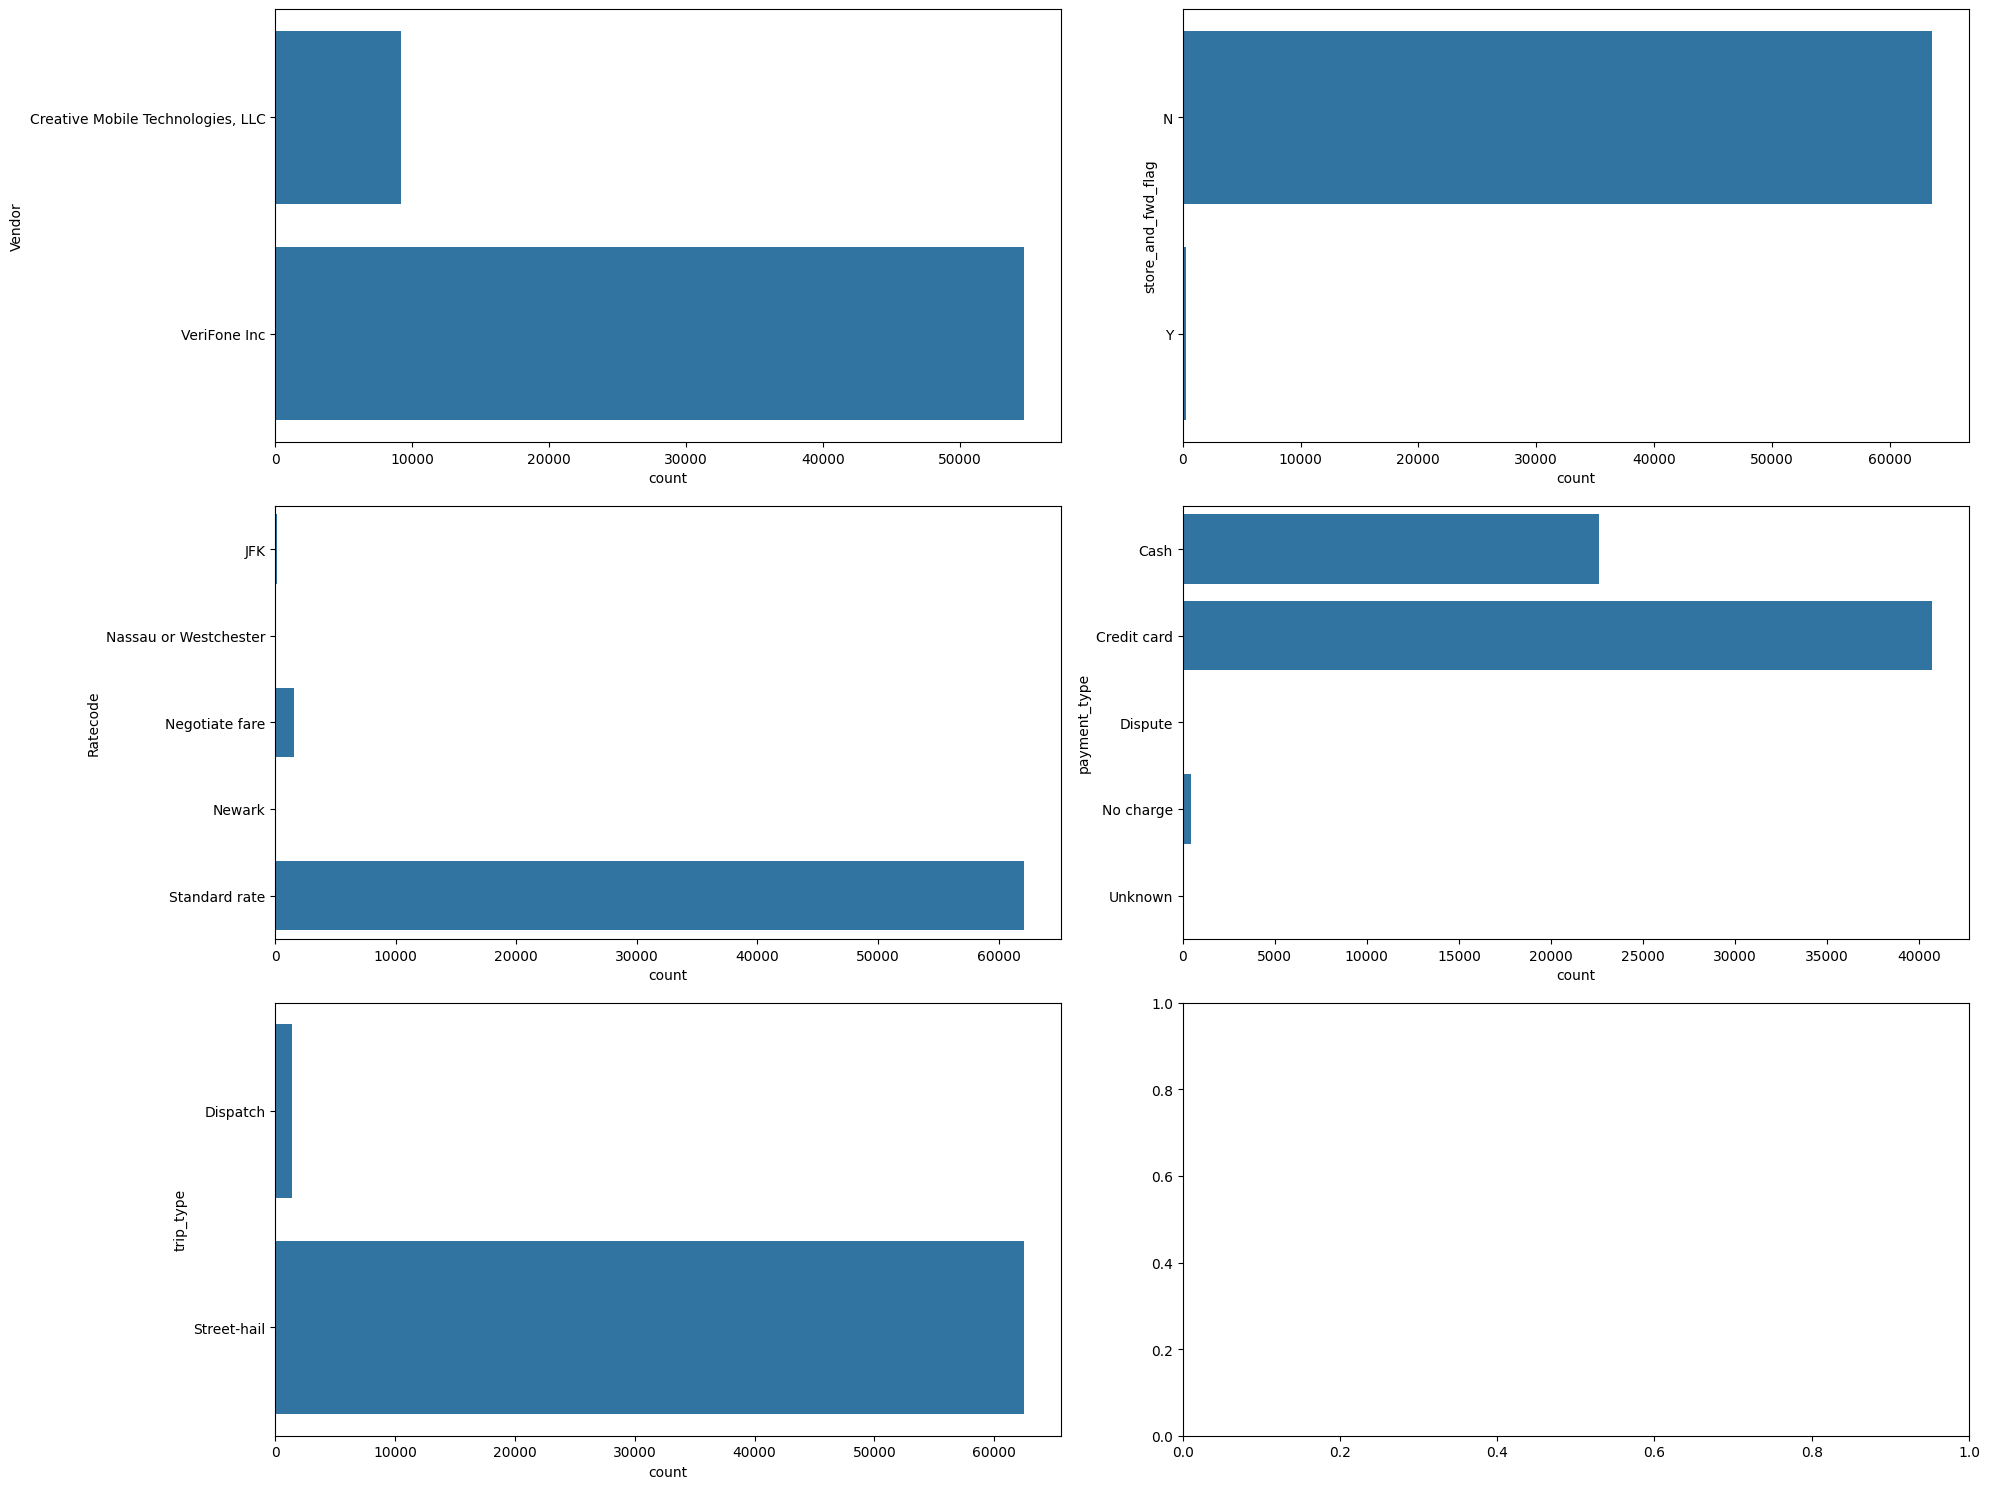

In [34]:
count_plot(
    df=df,
    features=qualitative_column
)

## Quantitative Data Distribution

In [35]:
def histogram_plot(df, features):
    n_column_axis = 4
    fig, ax = plt.subplots(math.ceil(len(features)/n_column_axis), n_column_axis, figsize=(20, 15))
    column_num = 0
    row_num = 0
    for feature in features:
        if column_num == 4:
            row_num += 1
            column_num = 0
        sns.histplot(data=df, x=feature, ax=ax[row_num][column_num])
        column_num += 1
    plt.tight_layout()
    plt.show()

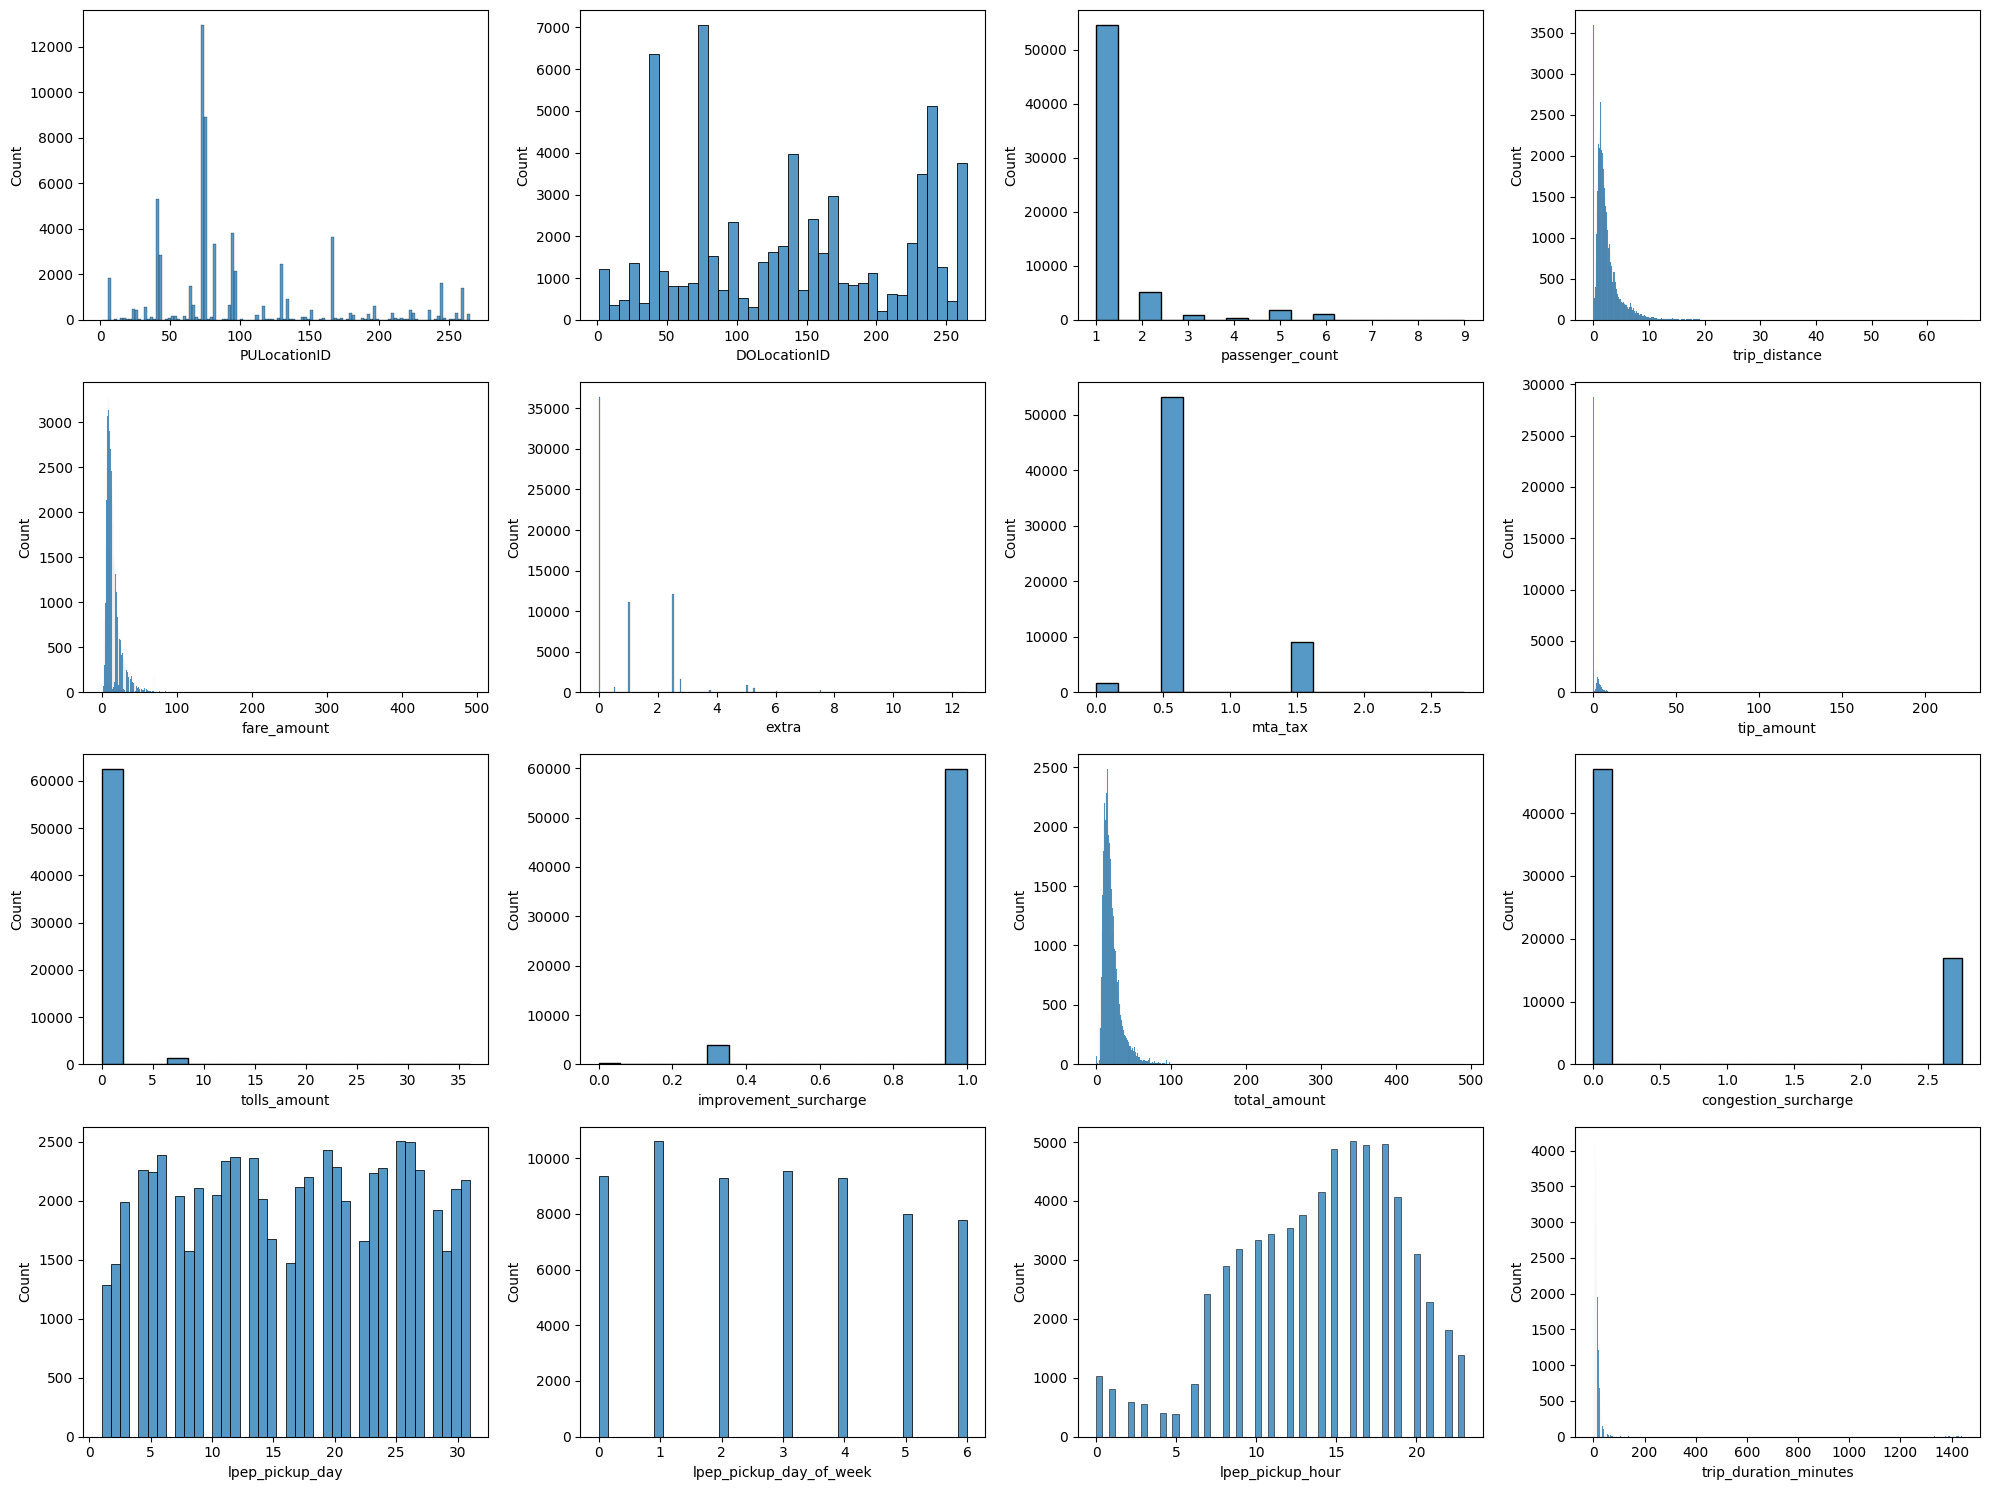

In [36]:
histogram_plot(
    df=df,
    features=quantitative_column
)

## Correlation

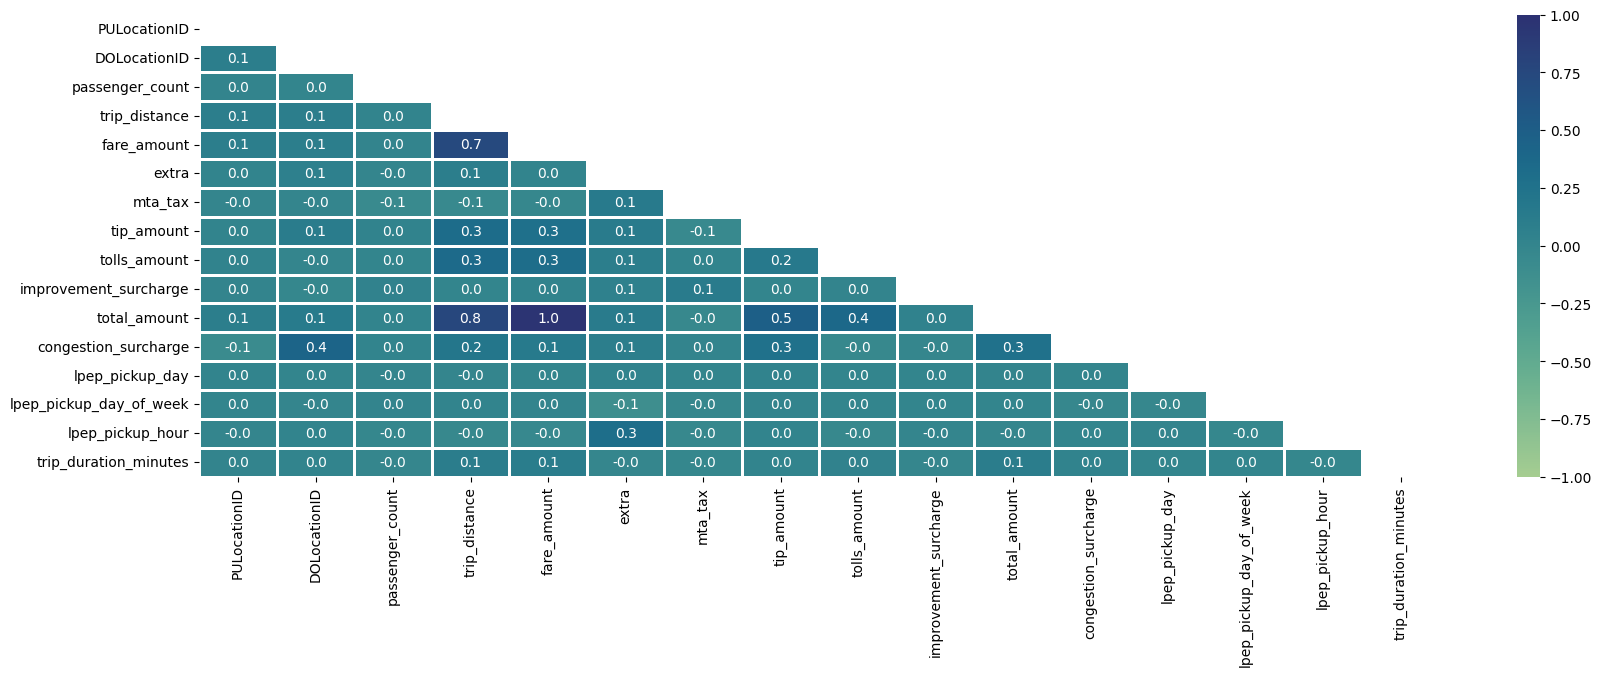

In [37]:
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix, mask=mask, vmax=1, vmin=-1, linewidths=.75,
            annot=True, fmt='.1f', cmap='crest')
plt.show()

# Explanatory Data Analysis

## 1. Top Borough

In [38]:
borough = df['PU Borough'].value_counts().reset_index()
borough

,PU Borough,count
0,Manhattan,37474
1,Queens,17257
2,Brooklyn,8013
3,Bronx,915
4,Unknown,135
5,Staten Island,12
6,EWR,1


[]

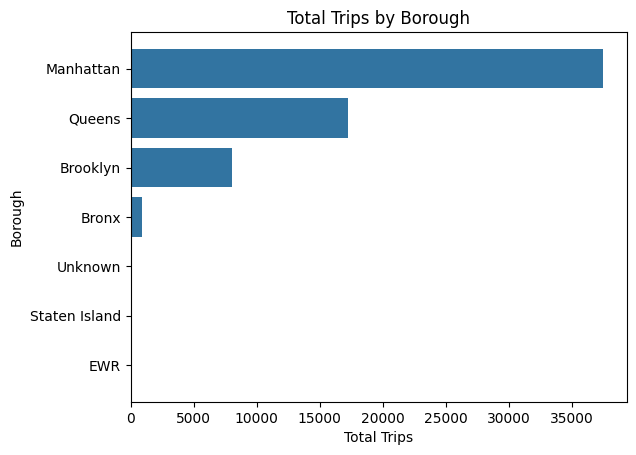

In [39]:
sns.barplot(data=borough, y='PU Borough', x='count')
plt.title('Total Trips by Borough')
plt.ylabel('Borough')
plt.xlabel('Total Trips')
plt.plot()

**INSIGHT:**

Borough with the largest total trips are Manhattan, Queens, Brooklyn. While Bronx and others borough total trips is very low compared to the top 3.

## 2. Trips Distribution for Each Borough

In [40]:
borough_uniq = list(df['PU Borough'].unique())

del_items = [ 'Unknown', np.nan, 'EWR']
for item in del_items:
    borough_uniq.remove(item)
borough_uniq

['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']

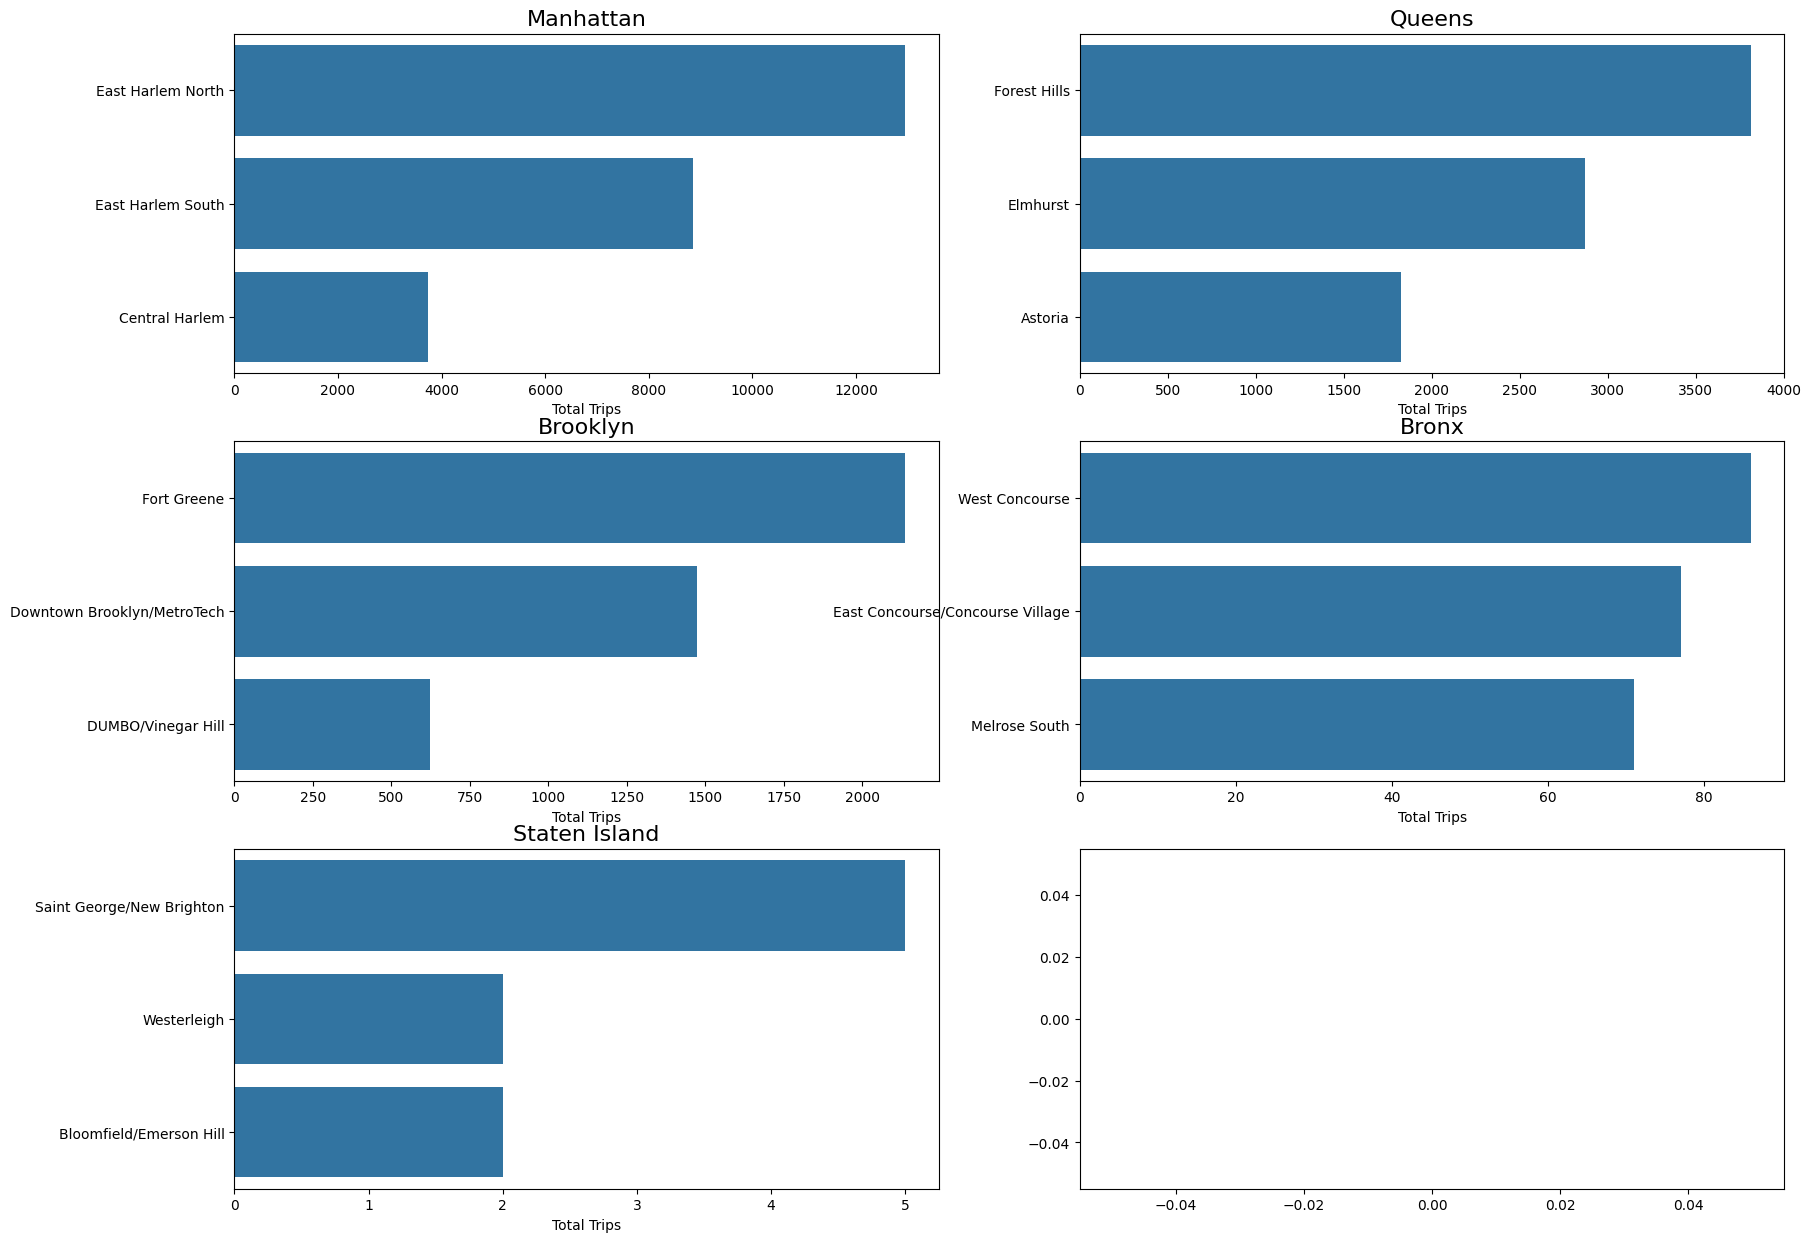

In [41]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))

row = 0
column = 0
for borough in borough_uniq:
    top_zone = df[df['PU Borough'] == borough]['PU Location Name'].value_counts()[:3].reset_index()
    sns.barplot(data=top_zone, y='PU Location Name', x='count', ax=ax[row, column])
    ax[row, column].set_title(borough, fontsize=16)
    ax[row, column].set_ylabel('')
    ax[row, column].set_xlabel('Total Trips')
    plt.plot()
    if column == 1:
        column = 0
        row += 1
    else:
        column += 1

To get a better picture, let's look the zone distribution of each Borough using a treemap. As the number of total trips for Staten Island is very low, we would'nt include them.

<div>
<img src="asset\pictures\11. manhattan zone.png" width="700"/> 
<img src="asset\pictures\12. queens zone.png" width="700"/> 
</div>
<div>
<img src="asset\pictures\13. brooklyn zone.png" width="700"/> 
<img src="asset\pictures\14. bronx zone.png" width="700"/> 
</div>

**INSIGHT:**

Zones with the largest total trips for each borough are:
1. Manhattan
<br>East Harlem North & East Harlem South combined was already taken more than half of the total trips in Manhattan. <br><br>
2. Queens
<br>Forest Hills & Elmhurst combined was already taken more than one third of the total trips in Queens. <br><br>
3. Brooklyn 
<br>Fort Greene & Downtown combined was already taken more than one third of the total trips in Brooklyn. <br><br>
4. Bronx
<br>Zones in Bronx are almost evenly distributed.

## 3. Trips Trends/Patterns by Time

In [42]:
# Daily Total Trips
daily = df['lpep_pickup_day'].value_counts(sort=False).reset_index()
daily.head()

,lpep_pickup_day,count
0,1,1287
1,2,1463
2,3,1986
3,4,2263
4,5,2245


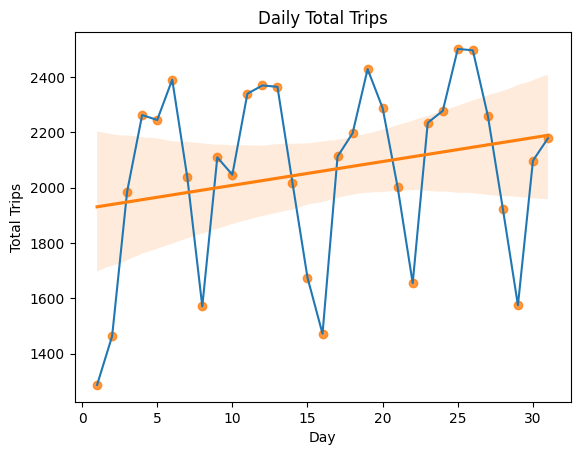

In [43]:
sns.lineplot(data=daily, x='lpep_pickup_day', y='count')
sns.regplot(data=daily, x='lpep_pickup_day', y='count')
plt.title('Daily Total Trips')
plt.ylabel('Total Trips')
plt.xlabel('Day')
plt.show()

**INSIGHT:**

We found that, there is a weekly pattern for total trips. The trend for total trips is upwards. It means that the demand is increased.

In [44]:
# Weekly Total Trips
weekly = df['lpep_pickup_day_name'].value_counts(sort=False).reset_index()
new_index = [1, 2, 3, 4, 5, 6, 0]
weekly = weekly.reindex(labels=new_index)
weekly

,lpep_pickup_day_name,count
1,Monday,9378
2,Tuesday,10603
3,Wednesday,9302
4,Thursday,9541
5,Friday,9304
6,Saturday,7981
0,Sunday,7763


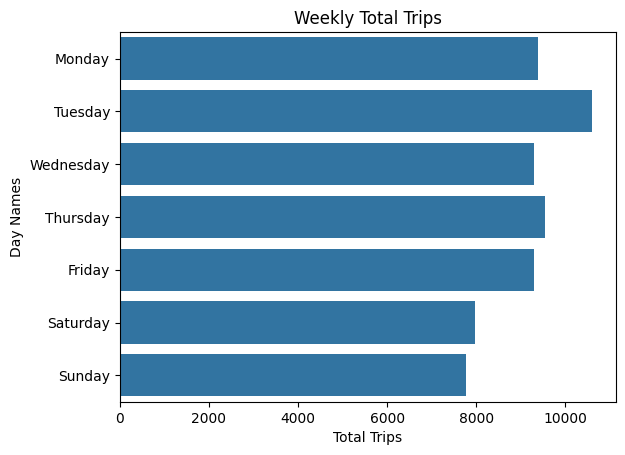

In [45]:
sns.barplot(data=weekly, y='lpep_pickup_day_name', x='count')
plt.title('Weekly Total Trips')
plt.xlabel('Total Trips')
plt.ylabel('Day Names')
plt.show()

**INSIGHT:**

Total trips in weekends (saturday & sunday) are lower than total trips in weekdays. Plus, Tuesday is the day with most total trips, exceeding any other weekdays that just having a slight different between each other.

In [46]:
# Hourly Total Trips
hourly = df['lpep_pickup_hour'].value_counts(sort=False).reset_index()
hourly.head()

,lpep_pickup_hour,count
0,0,1035
1,1,813
2,2,591
3,3,549
4,4,401


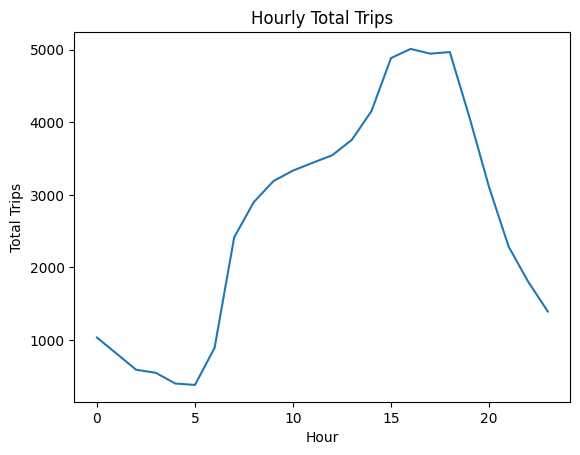

In [47]:
sns.lineplot(data=hourly, x='lpep_pickup_hour', y='count')
# sns.regplot(data=hourly, x='lpep_pickup_hour', y='count')
plt.title('Hourly Total Trips')
plt.ylabel('Total Trips')
plt.xlabel('Hour')
plt.show()

**INSIGHT:**

Total trips started to increase at 5am and reached it's peak at 3pm until 6pm. Then the number is slowly going lower.

In [48]:
# Total Trips by Time of Day
time_of_day = df['time_category'].value_counts(sort=False).reset_index()
new_index = [1, 2, 3, 0]
time_of_day = time_of_day.reindex(labels=new_index)
time_of_day

,time_category,count
1,morning,16556
2,afternoon,26299
3,evening,14433
0,night,6584


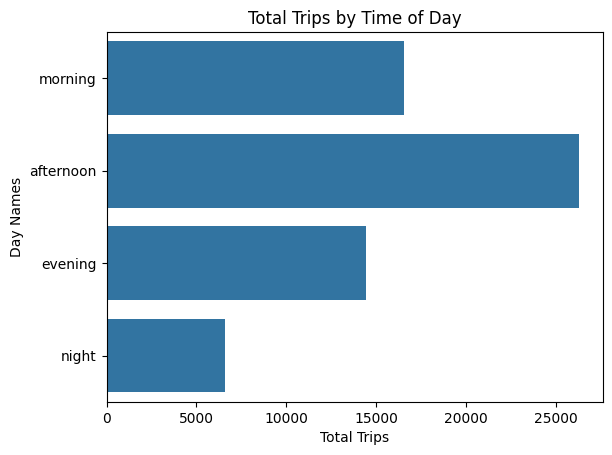

In [49]:
sns.barplot(data=time_of_day, y='time_category', x='count')
plt.title('Total Trips by Time of Day')
plt.xlabel('Total Trips')
plt.ylabel('Day Names')
plt.show()

**INSIGHT:**

Afternoon is having the most total trips, while night time is vice versa. This reflects very well to hourly total trips.

## Surprising Facts!!!
There are some interesting facts that I found while digging deep into the data. I am using Tableau to ease this process.

### 1. Night Time

<div>
<img src="asset\pictures\4. dashboard ss night time.png" width="1000"/> 
</div>

**INSIGHT:**

While Manhattan (upper area) is almost always being borough with the most total trips, Queens becomes borough with the most total trips in night time (10pm - 5am). The trend is going upwards which means an increase in demand. Total trips is higher at weekends with peak time at 10pm to 12 pm.

### 2. Brooklyn

<div>
<img src="asset\pictures\5. dashboard ss brooklyn.png" width="1000"/> 
</div>

**INSIGHT:**

Normally, total trips in each borough is higher at weekdays. Surprisingly, it does'nt apply to Brooklyn. Total trips in Brooklyn is higher in the weekends compared to weekdays and it reached it's peak at 3pm-8pm. The demand is increased by looking at the trend line of total daily trips.

# Conclusion & Recommendation

**Conclusion:**

In general, Upper Manhattan is the most promising borough to get a customer. Where zone of Harlem taking more than half of the total trips in Manhattan. The trend of demand is going upwards, indicating a potential increase of customers in this taxis category. Providing a room to growth. Weekdays have the most total trips with busy time at after hour or around 3pm to 6pm.

In the night time (10pm to 5am), Queens becomes borough with the most total trips. Where the weekends total trips are higher than the weekdays. Lastly, Brooklyn is the only one borough that more crowded in weekends rather than in weekdays like other boroughs.

**Recommendation:**

1. For weekdays, you should go to Upper Manhattan in any area of Harlem. After hours is the best time to do it.
2. If you want to do the job at night time (10pm to 5 am), you should try Queens. The best time to do it, is on weekends with peak time at 10pm to 12pm. You may go to Forest Hills or Jackson Heights.
3. If you want to take a ride in Brooklyn, you better be doing it in weekends. At the time of 3pm to 8pm to the zones of Port Greene or Downtown Brooklyn.

# Extras

## Yellow Taxi

In [50]:
yellow = pd.read_parquet('data/yellow_tripdata_2023-01.parquet')
yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [51]:
# Get Zone Name & Service Zone for Pick Up & Drop Off
yellow = yellow.merge(zone, left_on='PULocationID', right_on='LocationID').drop(axis=1, columns=['LocationID', 'Borough'])
yellow = yellow.merge(zone, left_on='DOLocationID', right_on='LocationID').drop(axis=1, columns=['LocationID', 'Borough'])
yellow.rename(columns={'Zone_x':'PU Location Name', 'service_zone_x':'PU Service Zone',
                       'Zone_y':'DO Location Name', 'service_zone_y':'DO Service Zone'}, inplace=True)
yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU Location Name,PU Service Zone,DO Location Name,DO Service Zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Midtown Center,Yellow Zone,Lenox Hill West,Yellow Zone
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Central Park,Yellow Zone,Upper East Side South,Yellow Zone
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Clinton East,Yellow Zone,Upper West Side North,Yellow Zone
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,LaGuardia Airport,Airports,Astoria,Boro Zone
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Gramercy,Yellow Zone,East Village,Yellow Zone


In [52]:
yellow.reset_index(drop=True, inplace=True)
yellow.to_csv('data/Yellow Cleaned.csv', index=False)

## Green Taxi Pick Up in Yellow Zone (illegal)

In [53]:
df_illegal = df[df['PU Service Zone'] == 'Yellow Zone']
df_illegal

,Vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,Ratecode,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_date,lpep_dropoff_date,lpep_pickup_day_name,lpep_pickup_day,lpep_pickup_day_of_week,lpep_pickup_hour,time_category,trip_duration_minutes,PU Borough,PU Location Name,PU Service Zone,DO Borough,DO Location Name,DO Service Zone
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,2023-01-01,2023-01-01,Sunday,1,6,0,night,6,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
7,VeriFone Inc,2023-01-01 00:11:58,2023-01-01 00:24:55,N,Standard rate,24,75,1,1.88,14.2,1.0,0.5,0.00,0.0,1.0,16.70,Cash,Street-hail,0.00,2023-01-01,2023-01-01,Sunday,1,6,0,night,12,Manhattan,Bloomingdale,Yellow Zone,Manhattan,East Harlem South,Boro Zone
9,VeriFone Inc,2023-01-01 00:50:32,2023-01-01 01:13:42,N,Standard rate,24,140,1,4.22,24.7,1.0,0.5,3.00,0.0,1.0,32.95,Credit card,Street-hail,2.75,2023-01-01,2023-01-01,Sunday,1,6,0,night,23,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Lenox Hill East,Yellow Zone
56,VeriFone Inc,2023-01-01 00:15:32,2023-01-01 00:23:03,N,Standard rate,24,239,1,1.47,10.0,1.0,0.5,4.58,0.0,1.0,19.83,Credit card,Street-hail,2.75,2023-01-01,2023-01-01,Sunday,1,6,0,night,7,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Upper West Side South,Yellow Zone
174,VeriFone Inc,2023-01-01 02:42:06,2023-01-01 02:50:38,N,Standard rate,43,161,1,3.19,14.2,1.0,0.5,3.75,0.0,0.3,22.50,Credit card,Street-hail,2.75,2023-01-01,2023-01-01,Sunday,1,6,2,night,8,Manhattan,Central Park,Yellow Zone,Manhattan,Midtown Center,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63695,VeriFone Inc,2023-01-31 21:46:47,2023-01-31 21:54:24,N,Standard rate,43,166,1,1.69,10.7,1.0,0.5,0.00,0.0,1.0,13.20,Cash,Street-hail,0.00,2023-01-31,2023-01-31,Tuesday,31,1,21,evening,7,Manhattan,Central Park,Yellow Zone,Manhattan,Morningside Heights,Boro Zone
63713,VeriFone Inc,2023-01-31 21:14:06,2023-01-31 21:31:05,N,Standard rate,43,50,2,3.36,19.1,1.0,0.5,4.73,0.0,0.3,28.38,Credit card,Street-hail,2.75,2023-01-31,2023-01-31,Tuesday,31,1,21,evening,16,Manhattan,Central Park,Yellow Zone,Manhattan,Clinton West,Yellow Zone
63752,VeriFone Inc,2023-01-31 20:44:58,2023-01-31 20:53:55,N,Standard rate,43,263,1,1.24,10.0,1.0,0.5,0.00,0.0,1.0,15.25,Credit card,Street-hail,2.75,2023-01-31,2023-01-31,Tuesday,31,1,20,evening,8,Manhattan,Central Park,Yellow Zone,Manhattan,Yorkville West,Yellow Zone
63758,VeriFone Inc,2023-01-31 22:03:48,2023-01-31 22:10:35,N,Standard rate,43,239,1,1.78,10.0,1.0,0.5,3.05,0.0,1.0,18.30,Credit card,Street-hail,2.75,2023-01-31,2023-01-31,Tuesday,31,1,22,night,6,Manhattan,Central Park,Yellow Zone,Manhattan,Upper West Side South,Yellow Zone


In [54]:
df_illegal['lpep_pickup_time'] = df_illegal['lpep_pickup_datetime'].dt.time
df_illegal['lpep_dropoff_time'] = df_illegal['lpep_dropoff_datetime'].dt.time

In [55]:
df_illegal['lpep_pickup_day_name'].value_counts(sort=False)

lpep_pickup_day_name
Sunday       256
Monday       581
Tuesday      771
Wednesday    702
Thursday     678
Friday       609
Saturday     315
Name: count, dtype: int64

In [56]:
df_illegal['PU Location Name'].value_counts()

PU Location Name
Central Park                     2851
Bloomingdale                      480
Upper East Side North             441
Yorkville West                     74
Yorkville East                      8
Seaport                             7
Manhattan Valley                    6
Lenox Hill East                     5
Kips Bay                            4
Two Bridges/Seward Park             4
Flatiron                            2
Upper West Side North               2
Chinatown                           2
Times Sq/Theatre District           2
TriBeCa/Civic Center                2
Upper West Side South               2
Clinton East                        2
Penn Station/Madison Sq West        1
Financial District North            1
Union Sq                            1
UN/Turtle Bay South                 1
Clinton West                        1
West Chelsea/Hudson Yards           1
Sutton Place/Turtle Bay North       1
Murray Hill                         1
Midtown Center                   

In [57]:
df['trip_type'].value_counts()

trip_type
Street-hail    62472
Dispatch        1400
Name: count, dtype: int64